In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [177]:
pip install pip --upgrade

Note: you may need to restart the kernel to use updated packages.


The filename, directory name, or volume label syntax is incorrect.


In [178]:
!pip install tensorflow


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [179]:
!pip install keras



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [180]:
import keras

In [181]:
f = open("data_0001.poscar", 'r')
print(f.read())

cod-2001647       6.4334275E+00 3.7676000E+00 2.7393300E+00 5.4144500E-01 3.2807750E+00    #! label, atEnergy (eV), egap (eV), eps_elec, eps_ion, eps_tot
1.0
  1.0276490000E+01   1.6515830000E-01   1.6034090000E-01
  1.8177520000E+00   6.3141700000E+00  -9.7529960000E-02
  1.7348840000E+00   2.1655910000E+00   5.2648280000E+00
C   H   O  
 16  20   8
Direct
  6.5026640000E-01   4.7089680000E-01   2.6080420000E-01
  3.4973370000E-01   5.2910340000E-01   7.3919490000E-01
  7.3005230000E-01   4.5481950000E-01   4.4966410000E-01
  2.6994740000E-01   5.4518020000E-01   5.5033570000E-01
  7.7831110000E-01   6.7955230000E-01   3.7982460000E-01
  2.2168840000E-01   3.2044690000E-01   6.2017700000E-01
  8.2780940000E-01   7.9338760000E-01   9.9707780000E-02
  1.7219060000E-01   2.0661270000E-01   9.0029430000E-01
  8.0927290000E-01   7.3080400000E-01   9.2693020000E-01
  1.9072750000E-01   2.6919670000E-01   7.3070180000E-02
  7.3529390000E-01   5.4167840000E-01   9.8663720000E-01
  2.647066000

In [182]:
import numpy as np
def reader(i):
    with open(i, "r") as file:
        data = file.readlines()
        l = []
        for line in data:
            word = line.split()
            l.append(word)
    return(l[6])

In [183]:
import glob

mydir = "C:\\Users\\91990\\Downloads\\suppl\\suppl\\data\\"

file_list = glob.glob(mydir + "/*.poscar")
data = []
for i in file_list:
    data.append(reader(i))
data
    

[['16', '20', '8'],
 ['24', '40', '6'],
 ['20', '36', '4'],
 ['30', '20', '8'],
 ['10', '10', '10'],
 ['20', '32', '2'],
 ['28', '16', '4'],
 ['20', '32', '8'],
 ['10', '18', '4'],
 ['22', '16', '6'],
 ['22', '24', '2'],
 ['16', '28', '8'],
 ['16', '28', '8'],
 ['20', '20', '6'],
 ['20', '18', '8'],
 ['20', '28', '4'],
 ['24', '20', '4'],
 ['16', '24', '8'],
 ['20', '20', '4'],
 ['10', '10', '6'],
 ['14', '24', '12'],
 ['22', '12', '8'],
 ['18', '24', '6'],
 ['16', '24', '8'],
 ['18', '16', '8'],
 ['12', '24', '12'],
 ['16', '40', '4'],
 ['16', '32', '4'],
 ['19', '20', '4'],
 ['18', '20', '6'],
 ['22', '20', '4'],
 ['16', '8', '12'],
 ['16', '24', '8'],
 ['16', '16', '8'],
 ['12', '28', '10'],
 ['20', '16', '4'],
 ['14', '20', '12'],
 ['18', '28', '4'],
 ['16', '24', '8'],
 ['16', '24', '4'],
 ['16', '20', '6'],
 ['11', '12', '5'],
 ['12', '28', '12'],
 ['12', '28', '10'],
 ['16', '32', '4'],
 ['18', '20', '4'],
 ['14', '20', '10'],
 ['16', '14', '10'],
 ['20', '16', '4'],
 ['16', '16

In [184]:
import pandas as pd
df = pd.DataFrame(data)
df[2] = df[2].fillna(0)
type(df.loc[200, 0])

str

# ATOMISATION ENERGY

In [185]:
data_target_ae = []
def reader_out_ae(i):
    with open(i, "r") as file:
        data = file.readlines()
        l = []
        for line in data:
            word = line.split()
            l.append(word)
    return(l[0][1])
for i in file_list:
    data_target_ae.append(reader_out_ae(i))
df_target_ae = pd.DataFrame(data_target_ae)
df_target_ae


,0
0,6.4334275E+00
1,6.0123523E+00
2,5.9708424E+00
3,7.1263336E+00
4,6.7118758E+00
...,...
210,6.0919229E+00
211,6.2310028E+00
212,6.1483299E+00
213,6.0748950E+00


In [186]:
df.to_csv('data.txt', sep='\t', index = False)
predictors_temp = np.loadtxt('data.txt')
predictors_temp = np.delete(predictors_temp, 0, 0)
predictors_temp 

array([[16., 20.,  8.],
       [24., 40.,  6.],
       [20., 36.,  4.],
       [30., 20.,  8.],
       [10., 10., 10.],
       [20., 32.,  2.],
       [28., 16.,  4.],
       [20., 32.,  8.],
       [10., 18.,  4.],
       [22., 16.,  6.],
       [22., 24.,  2.],
       [16., 28.,  8.],
       [16., 28.,  8.],
       [20., 20.,  6.],
       [20., 18.,  8.],
       [20., 28.,  4.],
       [24., 20.,  4.],
       [16., 24.,  8.],
       [20., 20.,  4.],
       [10., 10.,  6.],
       [14., 24., 12.],
       [22., 12.,  8.],
       [18., 24.,  6.],
       [16., 24.,  8.],
       [18., 16.,  8.],
       [12., 24., 12.],
       [16., 40.,  4.],
       [16., 32.,  4.],
       [19., 20.,  4.],
       [18., 20.,  6.],
       [22., 20.,  4.],
       [16.,  8., 12.],
       [16., 24.,  8.],
       [16., 16.,  8.],
       [12., 28., 10.],
       [20., 16.,  4.],
       [14., 20., 12.],
       [18., 28.,  4.],
       [16., 24.,  8.],
       [16., 24.,  4.],
       [16., 20.,  6.],
       [11., 12.

In [187]:
df_target_ae.to_csv('data_target_ae.txt', sep='\t', index = False)
target = np.loadtxt('data_target_ae.txt')
target_ae = np.delete(target, 0, 0)
target_ae

array([6.4334275, 6.0123523, 5.9708424, 7.1263336, 6.7118758, 6.0753783,
       7.2960613, 6.0965966, 6.00433  , 7.0070503, 6.584506 , 6.1003165,
       6.1007396, 6.6433703, 6.7297317, 6.257421 , 6.8810262, 6.2001278,
       6.6720965, 6.6447577, 6.0916841, 7.2851352, 6.3333511, 6.2606903,
       6.6991189, 6.0150355, 5.6264143, 5.8528694, 6.5995231, 6.5475802,
       6.7793642, 7.1770393, 6.1285028, 6.5236122, 5.7863048, 6.9276731,
       6.2857366, 6.1143078, 6.231857 , 6.1656946, 6.3644768, 6.5827578,
       5.8079428, 5.8144248, 5.7852155, 6.5772081, 6.3024567, 6.8487278,
       6.9522231, 6.6233622, 6.1656946, 6.3644768, 6.8209481, 5.8079428,
       5.8144248, 5.7852155, 6.5772081, 6.3024567, 6.8487278, 6.9522231,
       6.6233622, 6.0987466, 7.3005869, 6.6438923, 5.9085065, 6.1755041,
       6.3490594, 6.3583272, 7.3010421, 6.3752237, 6.7011838, 6.6748429,
       5.3117868, 6.3469694, 6.4705598, 5.8271033, 6.668479 , 6.6600342,
       6.3470051, 6.0719325, 6.4701961, 6.6742804, 

In [188]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [189]:
predictors = np.zeros(3)
for i in range(predictors_temp.shape[0]):
    fc = predictors_temp[i,0] / np.sum(predictors_temp[i])
    fh = predictors_temp[i,1] / np.sum(predictors_temp[i])
    fo = predictors_temp[i,2] / np.sum(predictors_temp[i])
    temp = np.array([fc, fh, fo])
    predictors = np.vstack((predictors, temp))
predictors = np.delete(predictors, 0, axis=0)

In [190]:
sc = StandardScaler()
predictors_norm = sc.fit_transform(predictors)


In [191]:
predictors_norm_train, predictors_norm_test, target_ae_train, target_ae_test = train_test_split(predictors_norm, target_ae, test_size=0.20, random_state=8, shuffle=True)
n_cols = predictors_norm.shape[1]

In [192]:
def regression_model_ae():
    model = Sequential()
    model.add(Dense(1000, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [193]:
model_ae = regression_model_ae()
trial_fit = model_ae.fit(predictors_norm_train, target_ae_train, epochs=1000, verbose=1, validation_split=0.01)

Epoch 1/1000
6/6 [==============================] - 1s 22ms/step - loss: 38.8400 - val_loss: 40.8367
Epoch 2/1000
6/6 [==============================] - 0s 6ms/step - loss: 33.8026 - val_loss: 34.5968
Epoch 3/1000
6/6 [==============================] - 0s 6ms/step - loss: 29.1112 - val_loss: 28.7874
Epoch 4/1000
6/6 [==============================] - 0s 6ms/step - loss: 24.5820 - val_loss: 23.1743
Epoch 5/1000
6/6 [==============================] - 0s 6ms/step - loss: 20.1601 - val_loss: 18.0396
Epoch 6/1000
6/6 [==============================] - 0s 6ms/step - loss: 16.2257 - val_loss: 13.0966
Epoch 7/1000
6/6 [==============================] - 0s 7ms/step - loss: 12.4654 - val_loss: 8.8438
Epoch 8/1000
6/6 [==============================] - 0s 6ms/step - loss: 9.2004 - val_loss: 5.3188
Epoch 9/1000
6/6 [==============================] - 0s 6ms/step - loss: 6.7293 - val_loss: 2.6424
Epoch 10/1000
6/6 [==============================] - 0s 6ms/step - loss: 4.9428 - val_loss: 1.0149
Epoch

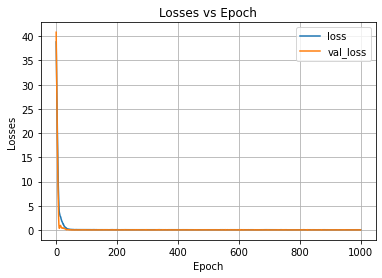

In [194]:
plt.figure()
plt.plot(trial_fit.history['loss'], label='loss')
plt.plot(trial_fit.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

In [195]:
test_ae_run = model_ae.predict(predictors_norm_train)

6/6 [==============================] - 0s 1ms/step


0.9793658001181749


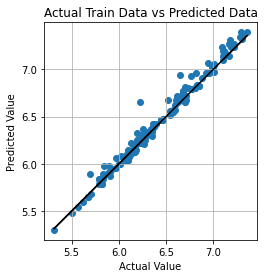

In [196]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_ae_train, test_ae_run)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_ae, target_ae, 'k-')
plt.grid()

print(r2_score(target_ae_train, test_ae_run))

In [197]:
predictions_ae = model_ae.predict(predictors_norm_test)

2/2 [==============================] - 0s 2ms/step


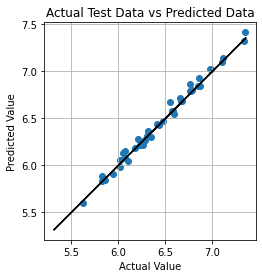

In [198]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_ae_test, predictions_ae)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_ae_train, target_ae_train, 'k-')
plt.grid()

In [199]:
print(r2_score(target_ae_test, predictions_ae))


0.9881504840810074


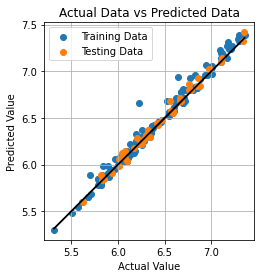

In [200]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_ae_train, test_ae_run, label = 'Training Data')
plt.scatter(target_ae_test, predictions_ae, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_ae_train, target_ae_train, 'k-')
plt.grid()

# ENERGY BAND GAP

In [201]:
data_target_ebg = []
def reader_out_ebg(i):
    with open(i, "r") as file:
        data = file.readlines()
        l = []
        for line in data:
            word = line.split()
            l.append(word)
    return(l[0][2])
for i in file_list:
    data_target_ebg.append(reader_out_ebg(i))
df_target_ebg = pd.DataFrame(data_target_ebg)
df_target_ebg


,0
0,3.7676000E+00
1,5.3473000E+00
2,3.5973000E+00
3,2.1866000E+00
4,2.5463000E+00
...,...
210,5.1049000E+00
211,4.8366000E+00
212,4.8920000E+00
213,5.6101000E+00


In [202]:
df_target_ebg.to_csv('data_target_ebg.txt', sep='\t', index = False)
target_ebg = np.loadtxt('data_target_ebg.txt')
target_ebg = np.delete(target_ebg, 0, 0)
target_ebg.shape

(215,)

In [340]:
predictors_norm_train, predictors_norm_test, target_ebg_train, target_ebg_test = train_test_split(predictors_norm, target_ebg, test_size=0.20, random_state=8, shuffle=True)
n_cols = predictors_norm.shape[1]

In [341]:
def regression_model_ebg():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.2))
    #model.add(Dense(69, activation = 'relu'))
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [342]:
model_ebg = regression_model_ebg()

trial_fit_ebg = model_ebg.fit(predictors_norm_train, target_ebg_train, epochs=500, verbose=1, validation_split=0.01)

Epoch 1/500
6/6 [==============================] - 1s 67ms/step - loss: 16.0759 - val_loss: 9.3725
Epoch 2/500
6/6 [==============================] - 0s 6ms/step - loss: 13.6938 - val_loss: 7.5818
Epoch 3/500
6/6 [==============================] - 0s 6ms/step - loss: 11.6468 - val_loss: 6.0723
Epoch 4/500
6/6 [==============================] - 0s 6ms/step - loss: 9.6066 - val_loss: 4.8136
Epoch 5/500
6/6 [==============================] - 0s 6ms/step - loss: 7.8508 - val_loss: 3.7273
Epoch 6/500
6/6 [==============================] - 0s 6ms/step - loss: 6.2588 - val_loss: 2.8614
Epoch 7/500
6/6 [==============================] - 0s 7ms/step - loss: 4.9321 - val_loss: 2.1473
Epoch 8/500
6/6 [==============================] - 0s 9ms/step - loss: 3.6703 - val_loss: 1.5499
Epoch 9/500
6/6 [==============================] - 0s 6ms/step - loss: 2.7459 - val_loss: 1.1106
Epoch 10/500
6/6 [==============================] - 0s 7ms/step - loss: 2.0216 - val_loss: 0.7903
Epoch 11/500
6/6 [=======

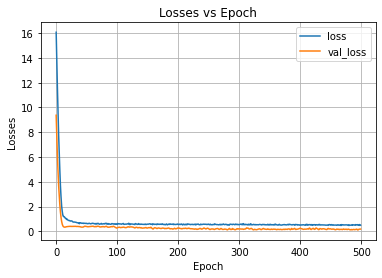

In [343]:
plt.figure()
plt.plot(trial_fit_ebg.history['loss'], label='loss')
plt.plot(trial_fit_ebg.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

In [344]:
test_ebg_run = model_ebg.predict(predictors_norm_train)

6/6 [==============================] - 0s 2ms/step


0.7921496035360331


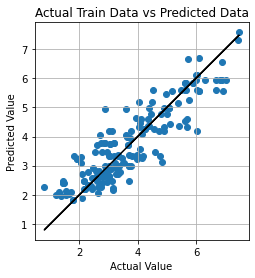

In [345]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_ebg_train, test_ebg_run)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_ebg, target_ebg, 'k-')
plt.grid()

print(r2_score(target_ebg_train, test_ebg_run))

In [346]:
predictions_ebg = model_ebg.predict(predictors_norm_test)

2/2 [==============================] - 0s 2ms/step


0.7006351866428815


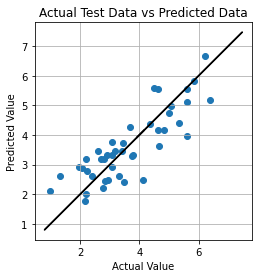

In [347]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_ebg_test, predictions_ebg)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_ebg_train, target_ebg_train, 'k-')
plt.grid()
print(r2_score(target_ebg_test, predictions_ebg))

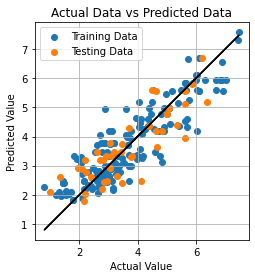

In [348]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_ebg_train, test_ebg_run, label = 'Training Data')
plt.scatter(target_ebg_test, predictions_ebg, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_ebg_train, target_ebg_train, 'k-')
plt.grid()

# Electronic Part of Dielectric Constant

In [212]:
data_target_eps_elec = []
def reader_out_eps_elec(i):
    with open(i, "r") as file:
        data = file.readlines()
        l = []
        for line in data:
            word = line.split()
            l.append(word)
    return(l[0][3])
for i in file_list:
    data_target_eps_elec.append(reader_out_eps_elec(i))
df_target_eps_elec = pd.DataFrame(data_target_eps_elec)
df_target_eps_elec

,0
0,2.7393300E+00
1,2.7008200E+00
2,2.6910100E+00
3,3.6015500E+00
4,3.2035800E+00
...,...
210,2.6991100E+00
211,2.7484600E+00
212,2.7476900E+00
213,2.8437900E+00


In [213]:
df_target_eps_elec.to_csv('data_target_eps_elec.txt', sep='\t', index = False)
target_eps_elec = np.loadtxt('data_target_eps_elec.txt')
target_eps_elec = np.delete(target_eps_elec, 0, 0)
target_eps_elec.shape

(215,)

In [396]:
predictors_norm_train, predictors_norm_test, target_eps_elec_train, target_eps_elec_test = train_test_split(predictors_norm, target_eps_elec, test_size=0.20, random_state=5, shuffle=True)
n_cols = predictors_norm.shape[1]

In [389]:
def regression_model_eps_elec():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
    #model.add(Dense(20, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [397]:
model_eps_elec = regression_model_eps_elec()

trial_fit_eps_elec = model_eps_elec.fit(predictors_norm_train, target_eps_elec_train, epochs=500, verbose=1, validation_split=0.01)

Epoch 1/500
6/6 [==============================] - 0s 21ms/step - loss: 8.3203 - val_loss: 4.1162
Epoch 2/500
6/6 [==============================] - 0s 7ms/step - loss: 6.6663 - val_loss: 2.6088
Epoch 3/500
6/6 [==============================] - 0s 7ms/step - loss: 5.2659 - val_loss: 1.5349
Epoch 4/500
6/6 [==============================] - 0s 7ms/step - loss: 4.1038 - val_loss: 0.8099
Epoch 5/500
6/6 [==============================] - 0s 7ms/step - loss: 3.1476 - val_loss: 0.3975
Epoch 6/500
6/6 [==============================] - 0s 7ms/step - loss: 2.3545 - val_loss: 0.2378
Epoch 7/500
6/6 [==============================] - 0s 7ms/step - loss: 1.7945 - val_loss: 0.2627
Epoch 8/500
6/6 [==============================] - 0s 6ms/step - loss: 1.3833 - val_loss: 0.3956
Epoch 9/500
6/6 [==============================] - 0s 7ms/step - loss: 1.1510 - val_loss: 0.5196
Epoch 10/500
6/6 [==============================] - 0s 7ms/step - loss: 1.0124 - val_loss: 0.6081
Epoch 11/500
6/6 [==========

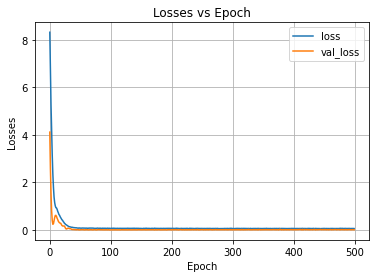

In [398]:
plt.figure()
plt.plot(trial_fit_eps_elec.history['loss'], label='loss')
plt.plot(trial_fit_eps_elec.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

In [399]:
test_eps_elec_run = model_eps_elec.predict(predictors_norm_train)

6/6 [==============================] - 0s 1ms/step


0.6727913366728222


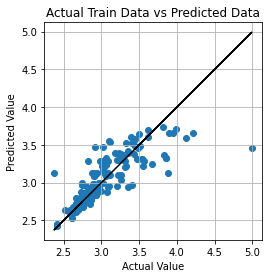

In [400]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_elec_train, test_eps_elec_run)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_elec, target_eps_elec, 'k-')
plt.grid()

print(r2_score(target_eps_elec_train, test_eps_elec_run))

In [401]:
predictions_eps_elec = model_eps_elec.predict(predictors_norm_test)

2/2 [==============================] - 0s 2ms/step


0.8662837071635311


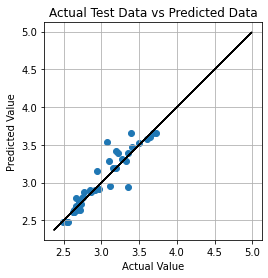

In [402]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_elec_test, predictions_eps_elec)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_elec_train, target_eps_elec_train, 'k-')
plt.grid()
print(r2_score(target_eps_elec_test, predictions_eps_elec))

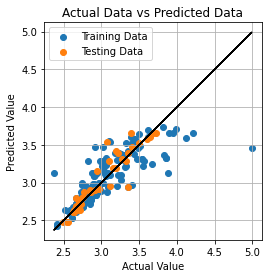

In [403]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_elec_train, test_eps_elec_run, label = 'Training Data')
plt.scatter(target_eps_elec_test, predictions_eps_elec, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_elec_train, target_eps_elec_train, 'k-')
plt.grid()

# Ionic Part of Dielectric Constant

In [223]:
data_target_eps_ion = []
def reader_out_eps_ion(i):
    with open(i, "r") as file:
        data = file.readlines()
        l = []
        for line in data:
            word = line.split()
            l.append(word)
    return(l[0][4])
for i in file_list:
    data_target_eps_ion.append(reader_out_eps_ion(i))
df_target_eps_ion = pd.DataFrame(data_target_eps_ion)
df_target_eps_ion

,0
0,5.4144500E-01
1,3.1951800E-01
2,4.1510600E-01
3,5.4433200E-01
4,1.4642400E+00
...,...
210,4.1876300E-01
211,4.9983100E-01
212,4.0495400E-01
213,9.3077500E-01


In [224]:
df_target_eps_ion.to_csv('data_target_eps_ion.txt', sep='\t', index = False)
target_eps_ion = np.loadtxt('data_target_eps_ion.txt')
target_eps_ion = np.delete(target_eps_ion, 0, 0)
target_eps_ion.shape

(215,)

In [225]:
predictors_norm_train, predictors_norm_test, target_eps_ion_train, target_eps_ion_test = train_test_split(predictors_norm, target_eps_ion, test_size=0.20, random_state=8, shuffle=True)
n_cols = predictors_norm.shape[1]

In [226]:
def regression_model_eps_ion():
    model = Sequential()
    model.add(Dense(500, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.2))
    #model.add(Dense(20, activation = 'relu'))
    #model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [227]:
model_eps_ion = regression_model_eps_ion()

trial_fit_eps_ion = model_eps_ion.fit(predictors_norm_train, target_eps_ion_train, epochs=1000, verbose=1, validation_split=0.01)

Epoch 1/1000
6/6 [==============================] - 1s 32ms/step - loss: 0.2925 - val_loss: 0.0068
Epoch 2/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.1160 - val_loss: 0.0330
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0925 - val_loss: 0.0303
Epoch 4/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0868 - val_loss: 0.0072
Epoch 5/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0817 - val_loss: 4.6407e-04
Epoch 6/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0670 - val_loss: 6.2521e-04
Epoch 7/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0575 - val_loss: 9.5415e-04
Epoch 8/1000
6/6 [==============================] - 0s 8ms/step - loss: 0.0550 - val_loss: 0.0020
Epoch 9/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0538 - val_loss: 0.0019
Epoch 10/1000
6/6 [==============================] - 0s 9ms/step - loss: 0.0474 - val_loss: 0.0033
Epoch 

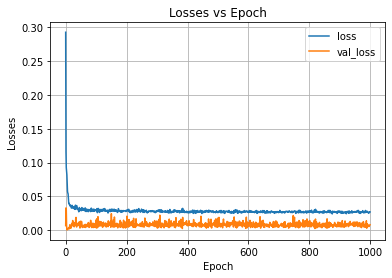

In [228]:
plt.figure()
plt.plot(trial_fit_eps_ion.history['loss'], label='loss')
plt.plot(trial_fit_eps_ion.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

In [229]:
test_eps_ion_run = model_eps_ion.predict(predictors_norm_train)

6/6 [==============================] - 0s 2ms/step


0.8071016273935618


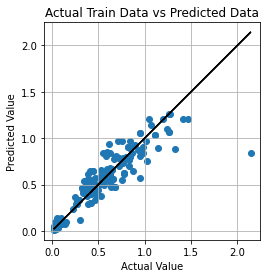

In [230]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_ion_train, test_eps_ion_run)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_ion, target_eps_ion, 'k-')
plt.grid()

print(r2_score(target_eps_ion_train, test_eps_ion_run))

In [231]:
predictions_eps_ion = model_eps_ion.predict(predictors_norm_test)

2/2 [==============================] - 0s 3ms/step


0.720510970197586


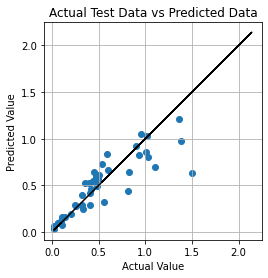

In [232]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_ion_test, predictions_eps_ion)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_ion_train, target_eps_ion_train, 'k-')
plt.grid()
print(r2_score(target_eps_ion_test, predictions_eps_ion))

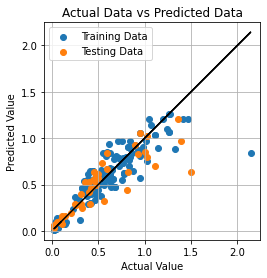

In [233]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_ion_train, test_eps_ion_run, label = 'Training Data')
plt.scatter(target_eps_ion_test, predictions_eps_ion, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_ion_train, target_eps_ion_train, 'k-')
plt.grid()

# Total Dielectric Constant

In [234]:
data_target_eps_tot = []
def reader_out_eps_tot(i):
    with open(i, "r") as file:
        data = file.readlines()
        l = []
        for line in data:
            word = line.split()
            l.append(word)
    return(l[0][5])
for i in file_list:
    data_target_eps_tot.append(reader_out_eps_tot(i))
df_target_eps_tot = pd.DataFrame(data_target_eps_tot)
df_target_eps_tot

,0
0,3.2807750E+00
1,3.0203380E+00
2,3.1061160E+00
3,4.1458820E+00
4,4.6678200E+00
...,...
210,3.1178730E+00
211,3.2482910E+00
212,3.1526440E+00
213,3.7745650E+00


In [235]:
df_target_eps_tot.to_csv('data_target_eps_tot.txt', sep='\t', index = False)
target_eps_tot = np.loadtxt('data_target_eps_tot.txt')
target_eps_tot = np.delete(target_eps_tot, 0, 0)
target_eps_tot.shape

(215,)

In [236]:
predictors_norm_train, predictors_norm_test, target_eps_tot_train, target_eps_tot_test = train_test_split(predictors_norm, target_eps_tot, test_size=0.20, random_state=6, shuffle=True)
n_cols = predictors_norm.shape[1]

In [237]:
def regression_model_eps_tot():
    model = Sequential()
    model.add(Dense(10, activation='relu', input_shape=(n_cols,)))
    model.add(Dropout(0.01))
    model.add(Dense(20, activation = 'relu'))
    model.add(Dense(50, activation = 'relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1, activation='linear'))
 
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [238]:
model_eps_tot = regression_model_eps_tot()

trial_fit_eps_tot = model_eps_tot.fit(predictors_norm_train, target_eps_tot_train, epochs=1000, verbose=1, validation_split=0.01)

Epoch 1/1000
6/6 [==============================] - 1s 32ms/step - loss: 12.7927 - val_loss: 13.4223
Epoch 2/1000
6/6 [==============================] - 0s 8ms/step - loss: 11.4970 - val_loss: 11.6628
Epoch 3/1000
6/6 [==============================] - 0s 8ms/step - loss: 10.3160 - val_loss: 9.9768
Epoch 4/1000
6/6 [==============================] - 0s 7ms/step - loss: 9.1162 - val_loss: 8.3176
Epoch 5/1000
6/6 [==============================] - 0s 8ms/step - loss: 7.9605 - val_loss: 6.7265
Epoch 6/1000
6/6 [==============================] - 0s 8ms/step - loss: 6.6965 - val_loss: 5.1391
Epoch 7/1000
6/6 [==============================] - 0s 8ms/step - loss: 5.5816 - val_loss: 3.6720
Epoch 8/1000
6/6 [==============================] - 0s 8ms/step - loss: 4.4959 - val_loss: 2.4536
Epoch 9/1000
6/6 [==============================] - 0s 7ms/step - loss: 3.7053 - val_loss: 1.5913
Epoch 10/1000
6/6 [==============================] - 0s 11ms/step - loss: 2.9809 - val_loss: 1.1160
Epoch 11/100

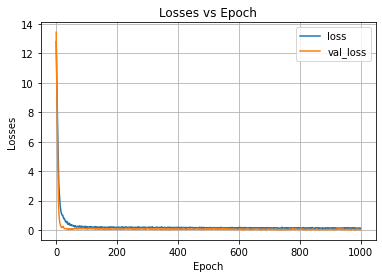

In [239]:
plt.figure()
plt.plot(trial_fit_eps_tot.history['loss'], label='loss')
plt.plot(trial_fit_eps_tot.history['val_loss'], label='val_loss')
plt.title("Losses vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Losses")
plt.grid()
plt.legend()

In [240]:
test_eps_tot_run = model_eps_tot.predict(predictors_norm_train)

6/6 [==============================] - 0s 2ms/step


0.7199004023269902


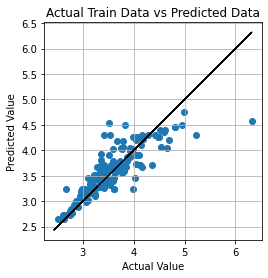

In [241]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_tot_train, test_eps_tot_run)
plt.title("Actual Train Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_tot, target_eps_tot, 'k-')
plt.grid()

print(r2_score(target_eps_tot_train, test_eps_tot_run))

In [242]:
predictions_eps_tot = model_eps_tot.predict(predictors_norm_test)

2/2 [==============================] - 0s 2ms/step


0.7035113636298553


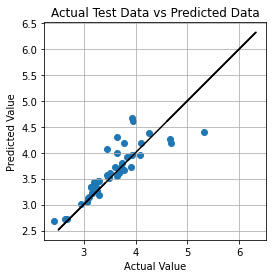

In [243]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_tot_test, predictions_eps_tot)
plt.title("Actual Test Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_tot_train, target_eps_tot_train, 'k-')
plt.grid()
print(r2_score(target_eps_tot_test, predictions_eps_tot))

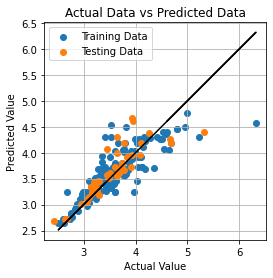

In [244]:
fig = plt.figure()
ax = fig.add_subplot()
ax.set_aspect('equal', adjustable='box')
plt.scatter(target_eps_tot_train, test_eps_tot_run, label = 'Training Data')
plt.scatter(target_eps_tot_test, predictions_eps_tot, label = 'Testing Data')
plt.legend()
plt.title("Actual Data vs Predicted Data")
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.plot(target_eps_tot_train, target_eps_tot_train, 'k-')
plt.grid()